In [31]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Dividing by 255.0 normalizes the pixel values to the range [0, 1], which is a common preprocessing step for neural networks to improve training performance

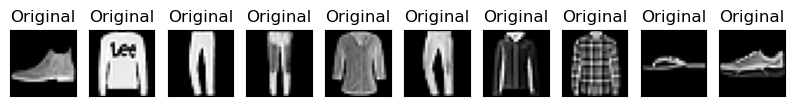

In [3]:
plt.figure(figsize=(10,12))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Пример 1: Компресија на слики со користење на основен автоенкодер

Во овој пример се користи основен авто-енкодер со два Dense слоеви. 

Со енкодерот се прави компресија на сликите во вектор со димензија 64 (тоа е латентната димензија), а со декодерот се прави реконструкција на оригиналната слика. Променливата latent_dim ја поставуваме на 64, односно тоа е големината на векторот во латентниот простор кој сакаме да го добиеме на излез од енкодерот.

Креираме класа Autoencoder каде се дефинираат енкодер и декодер слоевите. За секој слој се специфицира потребната големината на излезот, тоа е 64 (односно латентната димензија) на излез од енкодер слојот и 784 за излезот на декодер слојот. Излезниот вектор од декодер слојот кој е со големина 784 потоа се конвертира во слика со димензии 28x28, односно со големина иста како оригиналните слики.

Во овој пример, кај енкодер слојот се користи ReLU активациска функција, додека во декодер слојот се користи логистичка односно сигмуидална функција.

# Дефиниција на авто-енкодерот


In [4]:
latent_dim = 64

class AutoEncoder(Model): #nasleduva od Model klasata od keras kade sto gi imame site metodi
    def __init__(self, latent_dim):
        super(AutoEncoder, self).__init__()
        
        #Encoder 
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu') #golemina na izlezot - 64 (64-dimenzionalen latenten vektor)
        ])
        
        #Decoder 
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'), #izlezen vektor so 784 pikseli
            layers.Reshape((28,28)) #konverzija nazad vo 28x28 slika kako sto ni e inputot 
        ])
        
        
    # Metod kade sto definira kako modelot gi obrabotuva vleznite podatoci 
    def call(self, x): 
        encoded = self.encoder(x) #kompresija na podatocite vo latenten prostor (vo bottleneck)
        decoded = self.decoder(encoded) # dekodiranje (rekonstrukcija na orginalnite podatoci)
        
        return decoded #vraka rekonstruirana slika 

# Креирање на модел

In [5]:
autoencoder = AutoEncoder(latent_dim)

# Компилирање на моделот со функција на загуба (MSE) и Adam оптимизатор


In [6]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

# Моделот се тренира со користење на fit функцијата, каде x_train се проследува како влезно и излезно множество.

In [7]:
autoencoder.fit(x_train, x_train, epochs=10, validation_data=(x_test, x_test), shuffle=True)

Epoch 1/10


2025-02-12 18:43:26.068526: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 965us/step - loss: 0.0234 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 2s 939us/step - loss: 0.0116 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 2s 989us/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 2s 915us/step - loss: 0.0094 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 2s 851us/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 2s 914us/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 2s 928us/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 2s 931us/step - loss: 0.0088 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 2s 935us/step - loss

Откако ќе се истренира мрежата, потоа може да ја тестираме истата.

In [8]:
encoded_img = autoencoder.encoder(x_test).numpy()
decoded_img = autoencoder.decoder(encoded_img).numpy()

На крај, за првите 10 слики од податочното множество ќе ги прикажеме оригиналната слика (која се дава на влез на авто-енкодерот) и реконструираната слика (која се добива на излез од авто-енкодерот).

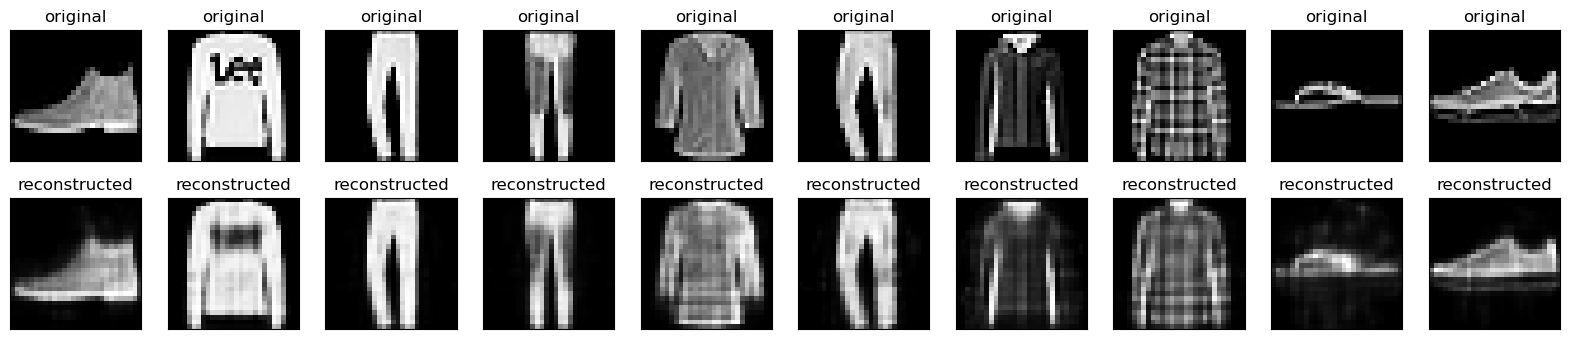

In [9]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_img[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# Пример 2: Отстранување на шум со користење на конволуциски авто-енкодер

# Denoising Auto-Encoder

Авто-енкодерите можат да се користат на отстранување на шум. Ова се базира на фактот дека нема корелации помеѓу шумот (тој е случаен), и со авто-енкодерот се откриваат само важните зависности кои постојат отфрлајќи ги случајните кои се резултат на шум.

Ќе креираме податочно множество добиено од Fashion MNIST податочното множество со додавање на шум во секоја слика. Потоа, авто-енкодерот нема да се тренира со оригиналните слики туку со сликите со шум, а таргет (цел) ќе биде оригиналната слика.

In [10]:
(x_train, _ ), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [11]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Потоа додаваме шум во податоците.

In [13]:
noise_factor = 0.2

#This line adds Gaussian noise to the x_train dataset. The noise is generated using tf.random.normal with the same shape as x_train and scaled by the noise_factor.
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

# This line clips the values in x_train_noisy to ensure they are within the range [0, 1]. This is necessary because pixel values should be within this range.
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

Добиените слики (сликите со шум) може да ги погледнеме со:

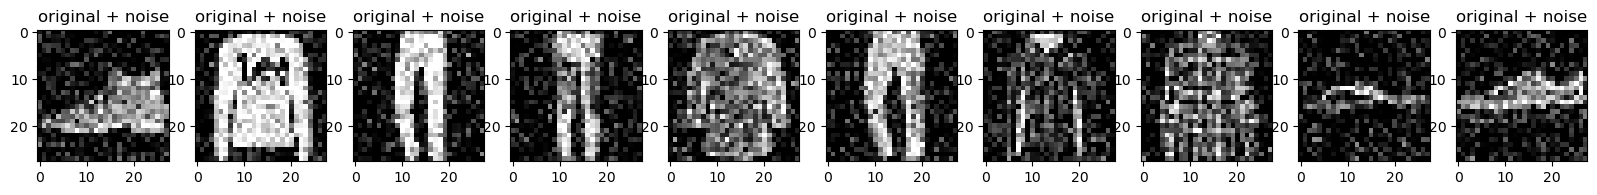

In [14]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

Следно, ќе креираме конволуциски авто-енкодер. Во овој пример користиме конволуциски авто-енкодер со Conv2D слоеви во енкодер делот, и Conv2DTranspose и Conv2D слоеви во декодер делот.

Креираме класа Denoise каде специфицираме кои слоеви ќе ги имаме во енкодер и декодер делот.

Во енкодер делот креираме два Conv2D слоеви со кои правиме компресија на сликата со димензии 28x28 во слика со димензии 7x7.

Во декодер делот имаме два Conv2DTranspose слоеви и еден Conv2D слој. Со декодер слојот компресираната слика ја реконструираме во слика со димензии како влезната слика односно 28x28.

Во овој пример, само кај последниот слој користиме сигмоидална активациска функција, а кај останатите слоеви се користи ReLU активациска функција.

In [16]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28,28,1)), # This line specifies the input shape of the data, which is (28, 28, 1). This corresponds to 28x28 pixel images with a single color channel (grayscale).
            
            layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
            
            layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation = 'relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation = 'relu', padding='same'),
            layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        
        return decoded

# Креирање на модел

In [17]:
denoise_autoencoder = Denoise()

Специфицираме дека ќе се користи Adam оптимизатор. За процена на загубата на информации специфицираме дека сакаме да се користи средната квадратна грешка.

In [23]:
denoise_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

При тренирање на мрежата, множеството со шум го поставуваме како тренинг множество, додека влезното множество се поставува како таргет.

In [24]:
denoise_autoencoder.fit(x_train_noisy, x_train, epochs=10, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0176 - val_loss: 0.0105
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0099 - val_loss: 0.0094
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0089 - val_loss: 0.0085
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [25]:
denoise_autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [26]:
denoise_autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


се тестира мрежата после тренирање 

In [27]:
encoded_img = denoise_autoencoder.encoder(x_test).numpy()
decoded_img = denoise_autoencoder.decoder(encoded_img).numpy()

На крај, за првите 10 слики од податочното множество ќе ги прикажеме влезната слика која се дава на влез на авто-енкодерот (тоа е сликата со шум) и реконструираната слика која се добива на излез од авто-енкодерот (тоа е сликата со отстранет шум).

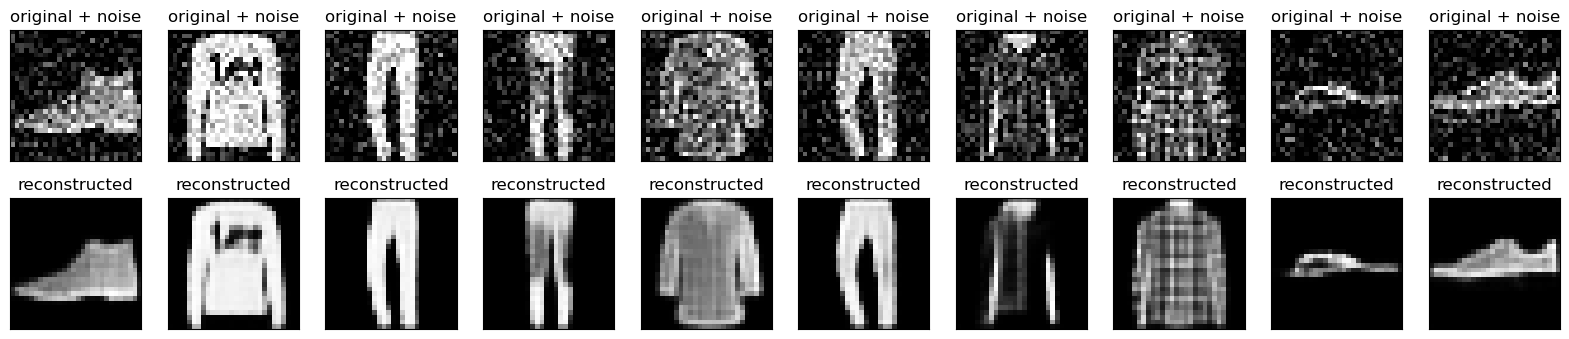

In [28]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_img[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()
     

# Пример 3: Детекција на аномалии со авто-енкодер

Во овој пример ќе се користи ECG5000 податочното множество кое е достапно на http://www.timeseriesclassification.com/description.php?Dataset=ECG5000.

Ова податочно множество содржи 5000 примероци за електрокардиограми (ЕКГ). Секој примерок претставува временска серија со 140 последователни вредности во ЕКГ сигналот.

Ќе користиме поедноставена верзија на ова податочно множество каде секој примерок е лабелиран со една од следниве две класи: класа 0 која одговара на абнормален срцев ритам и класа 1 која одговара на нормален срцев ритам.

Иако ова податочно множество е лабелирано и може да се користи за решавање на проблеми со надгледувано учење, ние ќе го користиме за да детектираме кои ЕКГ сигнали се со аномалии.

Авто-енкодерот ќе се тренира со користење само на ЕКГ сигналите со нормален ритам и ќе се користи за реконструкција на сите примероци. Детекцијата на аномалии се базира на претпоставката дека кај примероците со аномалии ќе има повисока грешка при реконструкција на примерокот. Може да се дефинира одреден праг, и сите примероци за кои грешката е над тој праг може да се детектираат како аномалии.

Целта е со овој пример да илустрираме на кој начин може да се прави детекција на аномалии во рамки на примероци од податочно множество каде имаме голем број на ЕКГ сигнали со нормален срцев ритами и мал број примероци со абнормален срцев ритам.

In [30]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = df.values
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


Потоа го делиме податочното множество на трениниг и тест множество.

Последната колона во податочното множество се однесува на класната лабела, додека останатите колони се однесуваат на вредностите во временската серија на дадениот ЕКГ примерок.

In [32]:
data = raw_data[:, 0:-1]
labels = raw_data[:,-1] 

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21) 

Следно, се прави нормализација на вредностите со цел сите вредности во тренинг множеството да се доведат во интервалот [0,1].

In [33]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

Бидејќи авто-енкодерот треба да се тренира само со користење на примероците со нормален ритам (од класа 1), затоа следно се прави поделба според типот на ритам.

In [34]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Со следниве наредби може да ги прикажеме првиот нормален и абнормален примерок од тренинг множеството:

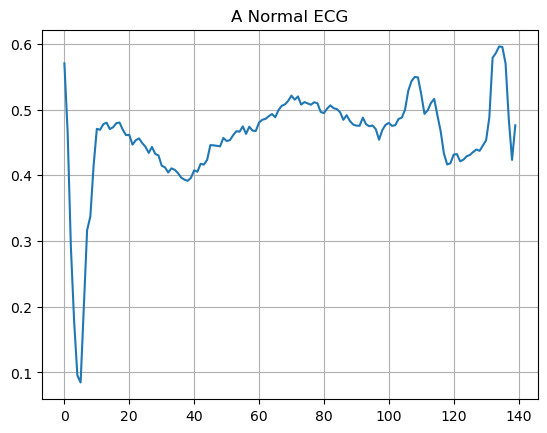

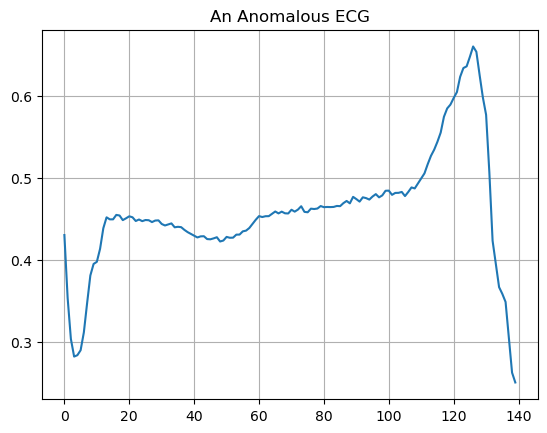

In [35]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

Следно, ќе креираме авто-енкодер со три Dense слоеви во енкодер делот, и три Dense слоеви во декодер делот.

Креираме класа AnomalyDetector каде специфицираме кои слоеви ќе ги имаме во енкодер и декодер делот.

Во енкодер делот креираме три Dense слоеви со кои правиме компресија на сигналот од вектор со должина 140 во вектор со должина 32, потоа во вектор со должина 16 и на крај компресија во вектор со должина 8.

Во декодер делот симетрично правиме пресликување на слоевите.

Со декодер слојот компресираниот сигнал го реконструираме во сигнал претставен со вектор со должина 140, исто како влезниот сигнал.

Во овој пример, само кај последниот слој користиме сигмоидална активациска функција, а кај останатите слоеви се користи ReLU активациска функција.

In [36]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        
        self.encoder = tf.keras.Sequential([
            layers.Dense(32, activation='relu'),
            layers.Dense(16, activation='relu'),
            layers.Dense(8, activation='relu'),
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(8, activation='relu'),
            layers.Dense(16, activation='relu'),
            layers.Dense(140, activation='sigmoid'), #sigmoid bidejki e binary classification
        ])
        
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        
        return decoded

In [37]:
anomaly_autoencoder = AnomalyDetector()

In [38]:
anomaly_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

При тренирање на мрежата специфицираме дека за тренирање се користи само делот од тренинг множеството со нормални примероци, додека за тестирање се користи целокупното тест множество.

In [39]:
history = anomaly_autoencoder.fit(normal_train_data, 
                                  normal_train_data, 
                                  epochs=20, 
                                  batch_size=512, 
                                  validation_data=(test_data, test_data),
                                  shuffle=True)

Epoch 1/20
5/5 [==============================] - 2s 17ms/step - loss: 0.0069 - val_loss: 0.0068
Epoch 2/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 3/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.0064
Epoch 4/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0060 - val_loss: 0.0062
Epoch 5/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 6/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0052 - val_loss: 0.0057
Epoch 7/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0054
Epoch 8/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.0051
Epoch 9/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0048
Epoch 10/20
5/5 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0045
Epoch 11/20
5/5 [=====================

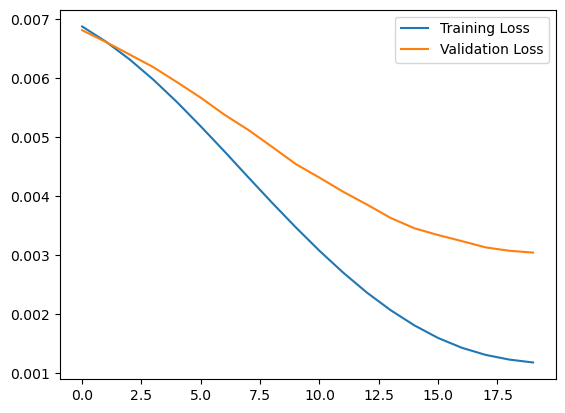

In [40]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

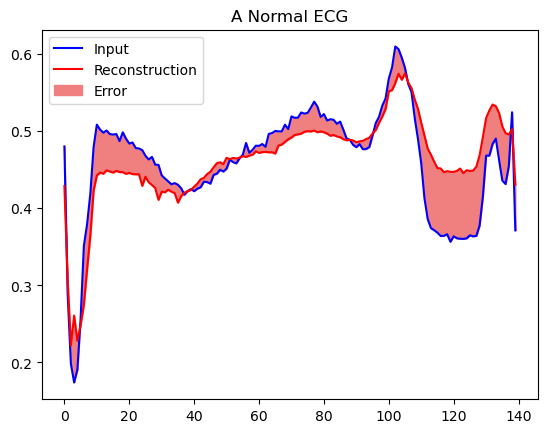

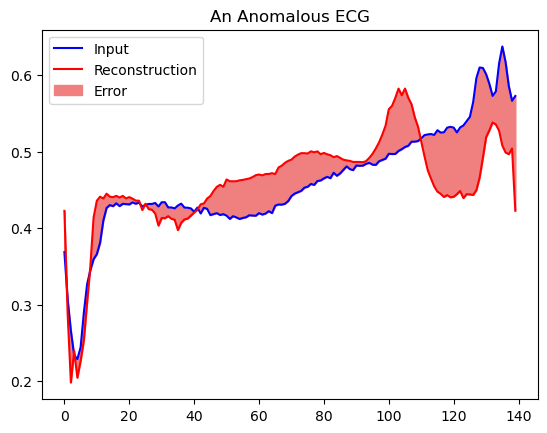

In [44]:
encoded_data = anomaly_autoencoder.encoder(normal_test_data).numpy()
decoded_data = anomaly_autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.title("A Normal ECG")
plt.show()

encoded_data = anomaly_autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = anomaly_autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.title("An Anomalous ECG")
plt.show()
     

74/74 [==============================] - 0s 638us/step


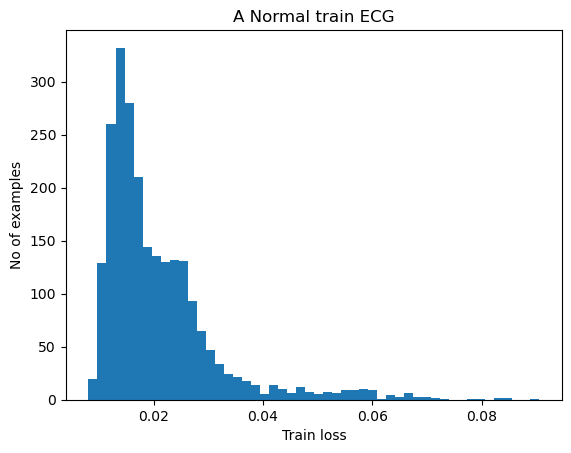

14/14 [==============================] - 0s 604us/step


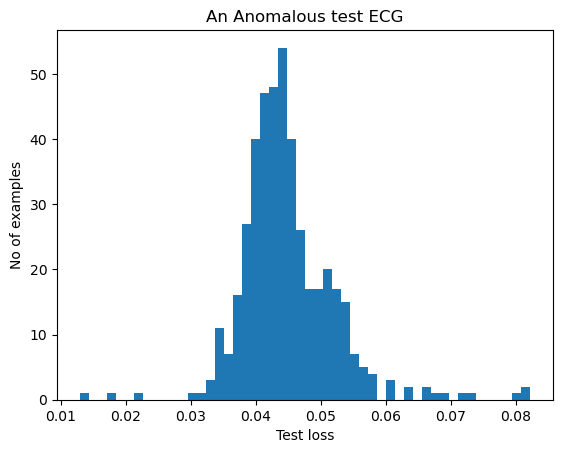

In [47]:
reconstructions = anomaly_autoencoder.predict(normal_train_data)

train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.title("A Normal train ECG")
plt.show()

reconstructions = anomaly_autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.title("An Anomalous test ECG")
plt.show()

Вредноста на прагот ќе ја дефинираме како mean(train_loss)+std(train_loss). Прагот може да го пресметаме со следниве наредби:

A threshold in the context of anomaly detection is a value that is used to distinguish between normal and anomalous data points. When the reconstruction error (or any other metric used for anomaly detection) exceeds this threshold, the data point is classified as an anomaly. The threshold can be set based on statistical measures such as the mean and standard deviation of the reconstruction errors.

In [49]:
threshold = np.mean(train_loss) + np.std(train_loss)
print(threshold)

0.031710654


In [50]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

Во продолжение ќе погледнеме како може да се прави предвидување за нови примероци.

In [51]:
preds = predict(anomaly_autoencoder, test_data ,threshold)

In [52]:
def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  
print_stats(preds, test_labels)

Accuracy = 0.941
Precision = 0.9921414538310412
Recall = 0.9017857142857143


Од резултатите може да заклучиме дека со моделот успешно се врши детекција на аномалии.

Класификациската точност е доста висока, односно со добиениот модел успешно може да се детектираат 94.3% од абнормалните ЕКГ сигнали во тест множеството.

Помеѓу примероците кои се препознаени како аномалии речиси сите навистина претставуваат абнормални примероци (затоа има висока прецизност).

Вредноста на одѕивот од 90.54% укажува на тоа дека може малку да се спушти прагот со цел поуспешно да успее моделот да препознае и од останатите абнормални примероци кои не се препознаени како аномалии со користење на оваа вредност за прагот.